In [11]:
import sympy as sym
from sympy.polys import subresultants_qq_zz

sym.init_printing()

The Bezout matrix is a special square matrix associated with two polynomials, introduced by Sylvester (1853) and Cayley (1857) and named after Étienne Bézout. Bézoutian may also refer to the determinant of this matrix, which is equal to the resultant of the two polynomials.

The entries of Bezout matrix are bilinear functions of coefficients of the given polynomials. The Bezout formulation has gone over different generalizations. The most common one is the Cayley.. Cayley's matrix is given by,

$$ \left|
\begin{array}{cc} 
p(x) & q(x)\\
p(a)& q(a)
\end{array}
\right| = \Delta(x, a)$$

where $\Delta(x, a)$ is the determinant.

We have the polynomial:

$$ \delta(x, a) = \frac{\Delta(x,a)}{x-a}$$

The matrix is then constructed from the coefficients of polynomial $\alpha$. Each coefficient is viewed as a polynomial of $x_1,..., x_n$.

The Bezout matrix is highly related to the Sylvester matrix and the greatest common divisor of polynomials. Unlike in Sylvester's formulation, where the resultant of $p$ and $q$ is the determinant of an $(m + n) \times (m + n)$ matrix, in the Cayley formulation, the resultant is obtained
as the determinant of a $n \times n$ matrix.

Example: Generic example
------------------------

In [2]:
b_3, b_2, b_1, b_0 = sym.symbols("b_3, b_2, b_1, b_0")
x = sym.symbols('x')

In [3]:
b = sym.IndexedBase("b")

In [4]:
p = b_2 * x ** 2 + b_1 * x + b_0
q = sym.diff(p, x)

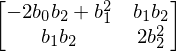

In [5]:
subresultants_qq_zz.bezout(p, q, x)

Example: Existence of common roots
------------------------------------------

Note that if the system has a common root we are expecting the resultant/determinant to equal to zero.

**A commot root exists.**

In [6]:
# example one
p = x ** 3 +1
q = x + 1

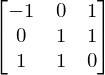

In [7]:
subresultants_qq_zz.bezout(p, q, x)

In [8]:
subresultants_qq_zz.bezout(p, q, x).det()

In [9]:
# example two
p = x ** 2 - 5 * x + 6
q = x ** 2 - 3 * x + 2

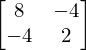

In [10]:
subresultants_qq_zz.bezout(p, q, x)

In [11]:
subresultants_qq_zz.bezout(p, q, x).det()

**A common root does not exist.**

In [12]:
z = x ** 2 - 7 * x + 12
h = x ** 2 - x

In [13]:
subresultants_qq_zz.bezout(z, h, x).det()

Dixon's Resultant
-----------------

Dixon (1908) showed how to extend this formulation to $m = 3$ polynomials in $n = 2$ variables.

In a similar manner but this time,

$$ \left|
\begin{array}{cc} 
p(x, y) & q(x, y) & h(x, y) \cr
p(a, y) & q(a, y) & h(b, y) \cr
p(a, b) & q(a, b) & h(a, b) \cr
\end{array}
\right| = \Delta(x, y, \alpha, \beta)$$

where $\Delta(x, y, \alpha, \beta)$ is the determinant.

Thus, we have the polynomial:

$$ \delta(x,y, \alpha, \beta) = \frac{\Delta(x, y, \alpha, \beta)}{(x-\alpha)(y - \beta)}$$

In [14]:
from sympy.polys.multivariate_resultants import DixonResultant

Example: Generic example of Dixon $(n=2, m=3)$
---------------------------------------------------

In [15]:
a_1, a_2, b_1, b_2, u_1, u_2, u_3 = sym.symbols('a_1, a_2, b_1, b_2, u_1, u_2, u_3')

In [16]:
y = sym.symbols('y')

In [17]:
p = a_1 * x ** 2 * y ** 2 + a_2 * x ** 2
q = b_1 * x ** 2 * y ** 2 + b_2 * y ** 2
h = u_1 * x + u_2 * y + u_3

In [18]:
dixon = DixonResultant(variables=[x, y], polynomials=[p, q, h])

In [19]:
poly = dixon.get_dixon_polynomial()

In [20]:
poly

In [21]:
matrix = dixon.get_dixon_matrix(poly)

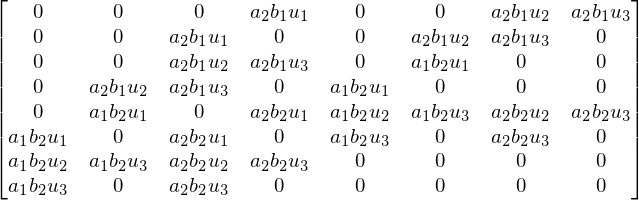

In [22]:
matrix

In [23]:
matrix.det().factor()

Dixon's General Case
--------------------

[Yang et al.](https://rd.springer.com/chapter/10.1007/3-540-63104-6_11) generalized the Dixon resultant method of three polynomials with two variables to the system of $n+1$ polynomials with $n$ variables.

Example: Numerical example
--------------------

In [24]:
p = x + y
q = x ** 2 + y ** 3
h = x ** 2 + y

In [25]:
dixon = DixonResultant([p, q, h], (x, y))

In [26]:
poly = dixon.get_dixon_polynomial()
poly.simplify()

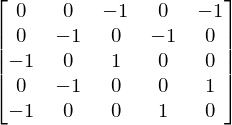

In [27]:
matrix = dixon.get_dixon_matrix(polynomial=poly)
matrix

In [28]:
matrix.det()

Example: Generic example
---------

In [29]:
a, b, c = sym.symbols('a, b, c')

In [30]:
p_1 = a * x ** 2 + b * x * y + (b + c - a) * x + a * y + 3 * (c - 1)
p_2 = 2 * a ** 2 * x ** 2 + 2 * a * b * x * y + a * b * y + b ** 3
p_3 = 4 * (a - b) * x + c * (a + b) * y + 4 * a * b

In [31]:
polynomials = [p_1, p_2, p_3]

In [32]:
dixon = DixonResultant(polynomials, [x, y])

In [33]:
poly = dixon.get_dixon_polynomial()

In [34]:
size = len(poly.monoms())
size

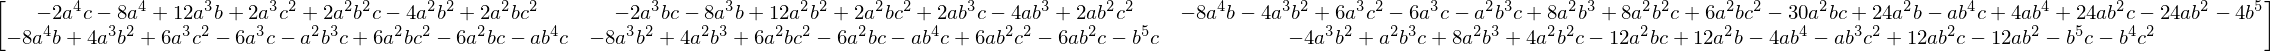

In [35]:
matrix = dixon.get_dixon_matrix(poly)
matrix

Example: 
--------------------------------------------------------------------------------------------------
**From [Dixon resultant’s solution of systems of geodetic polynomial equations](https://rd.springer.com/content/pdf/10.1007%2Fs00190-007-0199-0.pdf)**


In [36]:
z = sym.symbols('z')

In [37]:
f = x ** 2 + y ** 2 - 1 + z * 0
g = x ** 2 + z ** 2 - 1 + y * 0
h = y ** 2 + z ** 2 - 1

In [38]:
dixon = DixonResultant([f, g, h], [y, z])

In [39]:
poly = dixon.get_dixon_polynomial()

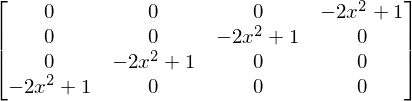

In [40]:
matrix = dixon.get_dixon_matrix(poly)
matrix

In [41]:
matrix.det()